# Kaggle Assignment  
## Blue Book for Bulldozers  
Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.  

The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.

Fast Iron is creating a "blue book for bull dozers," for customers to value what their heavy equipment fleet is worth at auction.  

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.  
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.  
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.  

The key fields in train.csv are:  

SalesID: the uniue identifier of the sale  
MachineID: the unique identifier of a machine.  A machine can be sold multiple times  
saleprice: what the machine sold for at auction (only provided in train.csv)  
saledate: the date of the sale  



### Abstract  
We have to predict the Sales price of heavy machinery at an auction. We have data through 2011 on which we have to train the model, try to predict accuracy. As mentioned in competition overview we also have Validation csv with data ranging from January 1, 2012 - April 30, 2012.    

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. Hence we will convert the salesPrice to log and calculate RMSE.  
In this assignment, we will train RandomForest model to get best RMSE.


In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
!pip install fastai==0.7.0 
# !pip install scikit-learn==0.21.3
# !pip install kaggle

  Using cached fastai-0.7.0-py3-none-any.whl (112 kB)
Processing c:\users\srush\appdata\local\pip\cache\wheels\7b\83\4b\44aa8f2292c0ae17a550c5105454e974fc45a5b2a522d66ae1\feather_format-0.4.1-py3-none-any.whl
  Using cached torchvision-0.5.0-cp38-cp38-win_amd64.whl (1.2 MB)
  Using cached ptyprocess-0.6.0-py2.py3-none-any.whl (39 kB)
  Using cached graphviz-0.14.2-py2.py3-none-any.whl (18 kB)
  Using cached torchtext-0.6.0-py3-none-any.whl (64 kB)
  Using cached plotnine-0.7.1-py3-none-any.whl (4.4 MB)
  Using cached opencv_python-4.4.0.44-cp38-cp38-win_amd64.whl (33.5 MB)
  Using cached sklearn_pandas-2.0.2-py2.py3-none-any.whl (10 kB)
  Using cached torch-0.1.2.post2.tar.gz (128 kB)
  Using cached bcolz-1.2.1.tar.gz (1.5 MB)
  Using cached isoweek-1.3.3-py2.py3-none-any.whl (7.1 kB)
  Using cached pyarrow-2.0.0-cp38-cp38-win_amd64.whl (10.7 MB)
  Using cached mizani-0.7.2-py3-none-any.whl (62 kB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached palettable-3.3.0

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\srush\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\srush\\AppData\\Local\\Temp\\pip-install-9xit6vty\\torch\\setup.py'"'"'; __file__='"'"'C:\\Users\\srush\\AppData\\Local\\Temp\\pip-install-9xit6vty\\torch\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\srush\AppData\Local\Temp\pip-wheel-99t6zj5v'
       cwd: C:\Users\srush\AppData\Local\Temp\pip-install-9xit6vty\torch\
  Complete output (30 lines):
  running bdist_wheel
  running build
  running build_deps
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\srush\AppData\Local\Temp\pip-install-9xit6vty\torch\setup.py", line 225, in <module>
      setup(name="torch", version="0.1.2.post2",
    File "C:\Users\srush\anaconda3\

In [1]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

ModuleNotFoundError: No module named 'fastai'

In [5]:
from google.colab import files
uploaded = files.upload()
# !echo '{"username":"srushti104","key":"d2256deb869ab4eb9675fce6aa4a0d28"}'


Saving kaggle.json to kaggle (2).json


In [6]:
#Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c bluebook-for-bulldozers

Machine_Appendix.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
random_forest_benchmark_test.csv: Skipping, found more recently modified local copy (use --force to force download)
Train.7z: Skipping, found more recently modified local copy (use --force to force download)
Test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Data%20Dictionary.xlsx: Skipping, found more recently modified local copy (use --force to force download)
Valid.7z: Skipping, found more recently modified local copy (use --force to force download)
ValidSolution.csv: Skipping, found more recently modified local copy (use --force to force download)
TrainAndValid.zip: Skipping, found more recently modified local copy (use --force to force download)
Valid.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
TrainAndValid.csv.zip: Skipping, found more recently modified local copy (use --force to fo

In [8]:
!ls

 Data%20Dictionary.xlsx		    submission.csv	    Train.csv
'kaggle (1).json'		    Test.csv		    Train.zip
'kaggle (2).json'		    Test.csv.zip	    Valid.7z
 kaggle.json			    tmp			    Valid.csv
 Machine_Appendix.csv.zip	    Train.7z		    Valid.csv.zip
 median_benchmark.csv		    TrainAndValid.7z	    ValidSolution.csv
 random_forest_benchmark_test.csv   TrainAndValid.csv.zip   Valid.zip
 sample_data			    TrainAndValid.zip


In [9]:
#Unzip command
!unzip -q Train.zip -d .

replace ./Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [10]:
#Necessary Methods and imorted from fastai 
#
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

#Splits dataset to extract validation set
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

#Calculate RMSE
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

#Print RMSE, R2 for train and validation set
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

#Get Out of Bag Score in RandomForestRegressor
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

#feature importance plot
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#Print metric score
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

### Dataset import and pre-processing

In [11]:
df_raw = pd.read_csv('Train.csv',low_memory=False, parse_dates=["saledate"])

In [12]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [13]:
display_all(df_raw.describe(include='all').T)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaT,NaT,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaT,NaT,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaT,NaT,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaT,NaT,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaT,NaT,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaT,NaT,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaT,NaT,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaT,NaT,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17,2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

In [14]:
#Change SalePrice to log because the evaluation is for RMSLE
df_raw.SalePrice  = np.log(df_raw.SalePrice)

This dataset contains a mix of continuous and categorical variables.

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals. You should always consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities.

In [15]:
#Change dates to date parts
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

/usr/local/lib/python3.6/dist-packages/fastai/structured.py:114: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())


0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [1]:
??add_datepart

Object `add_datepart` not found.


In [16]:
#Add a column for age of bulldozer
df_raw['age'] = df_raw['saleYear'] - df_raw['YearMade'] 

**String to Categorical**

In [17]:
#Change string variables to category type
train_cats(df_raw)

In [18]:
#Specify order for variable UsageBand and change to codes
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'],ordered =True,inplace= True)

In [19]:
df_raw.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

In [20]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,age
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200,2
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200,8
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600,3
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200,10
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,9.259131,1840702,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000,6
401121,6333337,9.305651,1830472,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,Non

Missing Values

In [21]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [22]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  float64 
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor         719

**PreProcessing**  
Handle continuous values, categories with numeric code and split dependent variable into separate variable.

In [23]:
#Savng file to feather 
#Feather is a fast, lightweight, and easy-to-use binary file format for storing data frames. 
#It has a few specific design goals: Lightweight, minimal API: make pushing data frames in and out of memory as simple as possible
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [24]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

In [25]:
#Change categories to code and missing values to 0, replace missing numeric values with median, 
#add column to indicate replaced missing values and separate the dependent variable as a separate df
df, y, nas = proc_df(df_raw, 'SalePrice')

In [26]:
#Split the dataset into training and validation sets. Use 12,000 as the validation set

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 67), (389125,), (12000, 67))

In [27]:
#Picking 50000 samples from train set 
set_rf_samples(50000)

In [28]:
#Base Model - We have not set any hyperparameter to the model yet. We will try to imporve this score.
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print("Train set RMSE, Validation set RMSE, Train set R*2, Validation set R*2")
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 21.8 s, sys: 331 ms, total: 22.1 s
Wall time: 12.1 s
Train set RMSE, Validation set RMSE, Train set R*2, Validation set R*2
[0.20955455994881472, 0.26375299150908266, 0.9082240143729501, 0.8757653438621329]


**Feature Engineering**  
Various methods are used to remove unimportant and redundant features. This not only simplifies the model but also improves the scores.

In [30]:
#Use the feature importance to find the most important ones
feature_importance = pd.DataFrame({'Feature' : X_train.columns, 'Importance' : m.feature_importances_})
feature_importance.sort_values('Importance', ascending=False, inplace=True)
feature_importance.head(10)

,Feature,Importance
37,Coupler_System,0.197828
64,age,0.163943
13,ProductSize,0.135911
14,fiProductClassDesc,0.133622
2,ModelID,0.075333
5,YearMade,0.051914
10,fiSecondaryDesc,0.031996
8,fiModelDesc,0.028346
63,saleElapsed,0.022463
0,SalesID,0.020206


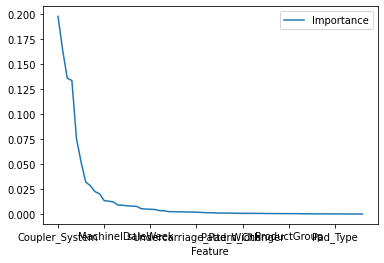

In [31]:
feature_importance.plot('Feature', 'Importance')

In [32]:
# Run the model for various cut off values for the importance to find the best set of importance features
for i in [ 0.002, 0.004, 0.006, 0.008, 0.010, 0.012]:
    important_features = feature_importance[feature_importance['Importance'] > i]
    df_important = df[important_features['Feature']]
    X_train, X_valid = split_vals(df_important, n_trn)
    y_train, y_valid = split_vals(y, n_trn)

    m = RandomForestRegressor(n_estimators=40, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)

[0.19498451366842726, 0.24632999428529104, 0.9205424691351207, 0.8916366138288827, 0.8975560204780709]
[0.19645731218508136, 0.2499275287740329, 0.9193375847040546, 0.8884483074824496, 0.8959680932225775]
[0.1962610886947281, 0.24825357516306373, 0.919498637056675, 0.8899375953213927, 0.8963083003006523]
[0.19732680686621787, 0.24985167435544386, 0.9186220018050806, 0.8885160103460344, 0.8950935869451795]
[0.19679472236245377, 0.2443916659248289, 0.9190602756927493, 0.8933352898337446, 0.8956836248802019]
[0.19716704745728092, 0.2449394160872108, 0.9187537187087728, 0.8928566230496547, 0.8952398573034576]


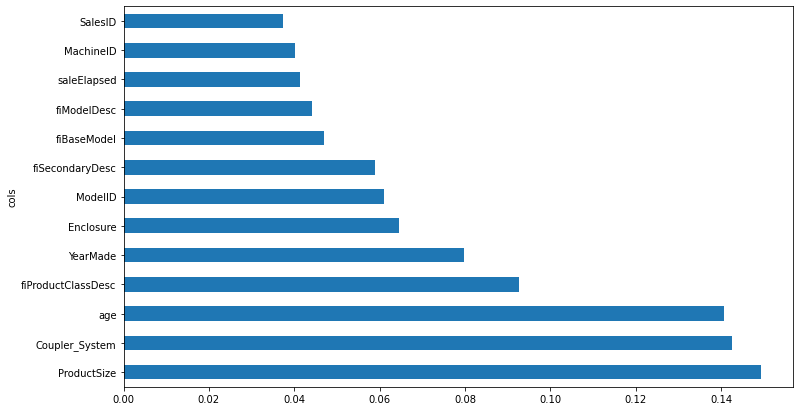

In [33]:
#Feature importance plot
fi = rf_feat_importance(m, df_important)
plot_fi(fi[:25]);

In [34]:
#The best cut off point seems to be 0.0.006 when the RMSE score is 0.22312856564640468.
important_features = feature_importance[feature_importance['Importance'] > 0.005]
df_important = df[important_features['Feature']]
X_train, X_valid = split_vals(df_important, n_trn)
#y_train, y_valid = split_vals(y, n_trn)

m = RandomForestRegressor(n_estimators=40, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1958769240520306, 0.2464595602530641, 0.9198134779681144, 0.8915225887422281, 0.8967364901397128]


**One Hot Encoding**  
proc_df's optional max_n_cat argument will turn some categorical variables into new columns.

For example, the column ProductSize which has 6 categories:
Large  
Large / Medium  
Medium  
Compact  
Small  
Mini  

gets turned into 6 new columns:  

ProductSize_Large  
ProductSize_Large / Medium  
ProductSize_Medium  
ProductSize_Compact  
ProductSize_Small  
ProductSize_Mini  

and the column ProductSize gets removed.  
  
It will only happen to columns whose number of categories is no bigger than the value of the max_n_cat argument.
  
Now some of these new columns may prove to have more important features than in the earlier situation, where all categories were in one column.  

In [35]:
#Passing  max_n_cat=7 to proc_df to convert df to one hot encoding
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20711394468484706, 0.25854620215166674, 0.9103493367908492, 0.8806219998020381, 0.8925437257792105]


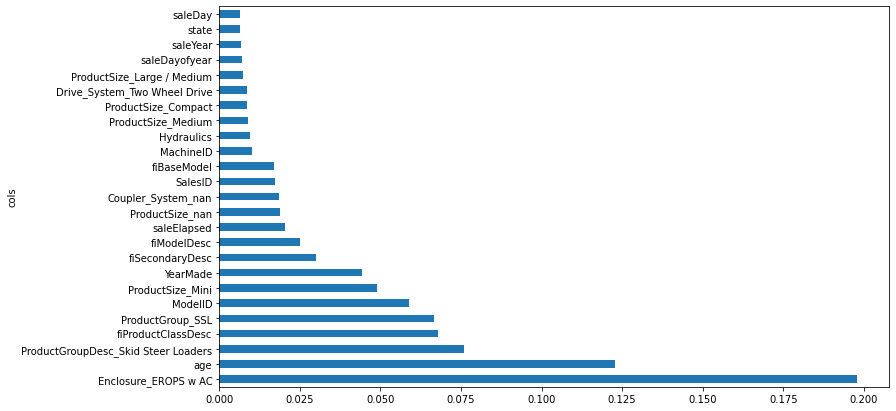

In [36]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

**Removing redundant features**

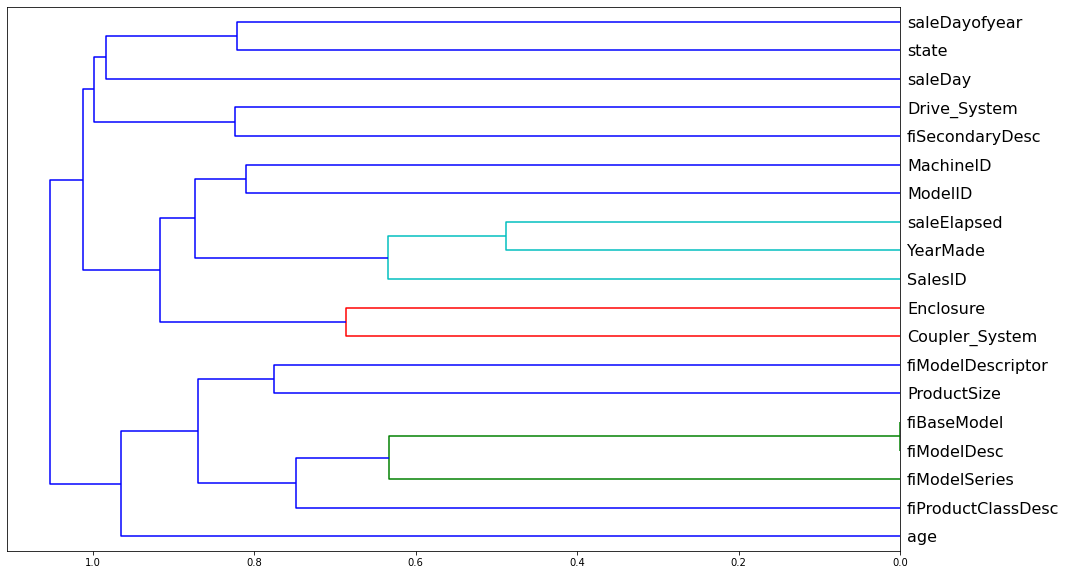

In [37]:
#Detect and remove redundant features
#Draw dendogram of feature clusters
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(df_important).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_important.columns, orientation='left', leaf_font_size=16)
plt.show()


In [39]:
#Get the OOB score after dropping each of the variables in the cluster pairs
for c in ('ProductSize', 'Coupler_System', 'fiModelDesc','MachineID'):
    print(c, get_oob(df_important.drop(c, axis=1)))

ProductSize 0.8914728258193447
Coupler_System 0.8959876603465851
fiModelDesc 0.8959624497056222
MachineID 0.8989397068344235


In [40]:
#For each pair select the attribute which impacts the score less (score is higher) and remove it and calculate OOB
to_drop = [ 'MachineID']
get_oob(df_important.drop(to_drop, axis=1))

0.8989078302406542

In [41]:
#OOB score has decreased slightly after removing attributes but model has become simpler.
#Run the random forest on the dataset after dropping the columns
df_important.drop(to_drop, axis=1,inplace=True)
X_train, X_valid = split_vals(df_important, n_trn)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
#These will be the imporatant columns which will be used in setting model
df_important.columns

Index(['Coupler_System', 'age', 'ProductSize', 'fiProductClassDesc', 'ModelID',
       'YearMade', 'fiSecondaryDesc', 'fiModelDesc', 'saleElapsed', 'SalesID',
       'Enclosure', 'fiBaseModel', 'state', 'saleDay', 'saleDayofyear',
       'fiModelDescriptor', 'Drive_System', 'fiModelSeries'],
      dtype='object')

**Final Model**

In [43]:
#Run the final model
m = RandomForestRegressor(n_estimators=160,min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2034242682272474, 0.24231610462699646, 0.9135150873973108, 0.895139353325865, 0.8979994093583986]


## Validation 
Now lets train the model on the full training dataset and check the score on the validation set provided by Kaggle.

To get the same set of category codes and uniformly imputing missing values, we are joining the training and validation sets and pre-processing them together. After preprocessing we will separate them *again*

In [44]:
!unzip -q Valid.zip -d .

replace ./Valid.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [45]:
df_train  = pd.read_csv('Train.csv',low_memory=False, parse_dates=["saledate"])
df_valid = pd.read_csv('Valid.csv',low_memory=False, parse_dates=["saledate"])

In [46]:
print('training shape',df_train.shape)
print('validation shape', df_valid.shape)

training shape (401125, 53)
validation shape (11573, 52)


In [47]:
print('difference between training and validaiton', set(df_train.columns) - set(df_valid.columns))

difference between training and validaiton {'SalePrice'}


In [48]:
#Separate out the SalePrice as y and change it to log and drop it from the training set
y = np.log(df_train['SalePrice'])
df_train = df_train.drop('SalePrice', axis=1)

In [49]:
#Append the validation set to the training set
df_train_valid = df_train.append(df_valid)

In [50]:
df_train_valid.shape

(412698, 52)

In [51]:
#Change dates to date parts
add_datepart(df_train_valid, 'saledate')

/usr/local/lib/python3.6/dist-packages/fastai/structured.py:114: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())


In [52]:
#Add a column for age of bulldozer
df_train_valid['age'] = df_train_valid['saleYear'] - df_train_valid['YearMade'] 

In [53]:
#Change string variables to category type
train_cats(df_train_valid)

In [55]:
#Change other categories into codes and replace NaNs with 0.
cat_cols = list(df_train_valid.select_dtypes(include=['category']).columns)  #Above UsageType is changed to Int 
for col in cat_cols:
    s = df_train_valid[col] 
    df_train_valid[col] = s.cat.codes+1

In [56]:
# Replace the NaNs for the numerical column with mean
df_train_valid['auctioneerID'].fillna(df_train_valid['auctioneerID'].median(), inplace=True)
df_train_valid['MachineHoursCurrentMeter'].fillna(df_train_valid['MachineHoursCurrentMeter'].median(), inplace=True)

In [57]:
#Check if df has NaNs
df_train_valid.isnull().sum()

SalesID                 0
MachineID               0
ModelID                 0
datasource              0
auctioneerID            0
                       ..
saleIs_quarter_start    0
saleIs_year_end         0
saleIs_year_start       0
saleElapsed             0
age                     0
Length: 65, dtype: int64

In [58]:
df_train_valid.shape

(412698, 65)

In [59]:
df_train_valid.head().transpose()

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
saleIs_quarter_start,False,False,False,False,False
saleIs_year_end,False,False,False,False,False
saleIs_year_start,False,False,False,False,False
saleElapsed,1163635200,1080259200,1077753600,1305763200,1248307200


In [60]:
# The pre-processed dataset is ready. Now need to choose only columns which were in our final model and run the model. These were the columns in the final model
df_important.columns

Index(['Coupler_System', 'age', 'ProductSize', 'fiProductClassDesc', 'ModelID',
       'YearMade', 'fiSecondaryDesc', 'fiModelDesc', 'saleElapsed', 'SalesID',
       'Enclosure', 'fiBaseModel', 'state', 'saleDay', 'saleDayofyear',
       'fiModelDescriptor', 'Drive_System', 'fiModelSeries'],
      dtype='object')

In [61]:
#Choose only columns which were used in the final model
df_train_valid = df_train_valid[df_important.columns]

#Separate the training and validation sets
df_valid = df_train_valid.tail(df_valid.shape[0])
df_train = df_train_valid.head(df_train.shape[0])

In [62]:
df_valid = df_valid[df_important.columns]

In [63]:
print(df_valid.shape)
print(df_train.shape)

(11573, 18)
(401125, 18)


In [64]:
reset_rf_samples()

In [65]:
#m = RandomForestRegressor(n_estimators=160,min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(df_train, y)
print_score(m)

[0.16703844723081945, 0.17352882660663957, 0.9416866872099274, 0.9462236608343231, 0.9154796556766722]


In [66]:
validSolution  = pd.read_csv('ValidSolution.csv',low_memory=False)

In [67]:
y_actual = np.log(validSolution.SalePrice) 

**RMSLE on Validation Set**

In [68]:
#Calculate the RMSE using the prediction from the validation set and the actual provided by Kaggle in the file 'ValidSolutions.csv'
rmse(m.predict(df_valid), y_actual)

0.2447702628241664

## Test Set

In [69]:
!unzip -q Test.csv.zip -d .

replace ./Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [70]:
df_train  = pd.read_csv('Train.csv',low_memory=False, parse_dates=["saledate"])
df_test = pd.read_csv('Test.csv',low_memory=False, parse_dates=["saledate"])

In [71]:
print('training shape',df_train.shape)
print('test shape', df_test.shape)

training shape (401125, 53)
test shape (12457, 52)


In [72]:
print('difference between training and test', set(df_train.columns) - set(df_test.columns))

difference between training and test {'SalePrice'}


In [73]:
#Separate out the SalePrice as y and change it to log and drop it from the training set
y = np.log(df_train['SalePrice'])
df_train = df_train.drop('SalePrice', axis=1)

In [74]:
#Append the validation set to the training set
df_train_test = df_train.append(df_test)

In [75]:
df_train_test.shape

(413582, 52)

In [76]:
#Change dates to date parts
add_datepart(df_train_test, 'saledate')

/usr/local/lib/python3.6/dist-packages/fastai/structured.py:114: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())


In [77]:
#Add a column for age of bulldozer
df_train_test['age'] = df_train_test['saleYear'] - df_train_test['YearMade'] 

In [78]:
#Change string variables to category type
train_cats(df_train_test)

In [79]:
df_train_test.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)
df_train_test.UsageBand = df_train_test.UsageBand.cat.codes

In [80]:
#Change other categories into codes and replace NaNs with 0.
cat_cols = list(df_train_test.select_dtypes(include=['category']).columns)  #Above UsageType is changed to Int 
for col in cat_cols:
    s = df_train_test[col] 
    df_train_test[col] = s.cat.codes+1

In [81]:
# We can find how the columns differ using sets
set(df_train.columns)-set(df_test.columns)

set()

In [82]:
#Replace the NaNs for the numerical column with mean
df_train_test['auctioneerID'].fillna(df_train_test['auctioneerID'].median(), inplace=True)
df_train_test['MachineHoursCurrentMeter'].fillna(df_train_test['MachineHoursCurrentMeter'].median(), inplace=True)

In [83]:
#Check if df has NaNs
df_train_test.isnull().sum()

SalesID                 0
MachineID               0
ModelID                 0
datasource              0
auctioneerID            0
                       ..
saleIs_quarter_start    0
saleIs_year_end         0
saleIs_year_start       0
saleElapsed             0
age                     0
Length: 65, dtype: int64

In [84]:
df_train_test.shape

(413582, 65)

In [85]:
df_train_test.head().transpose()

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
saleIs_quarter_start,False,False,False,False,False
saleIs_year_end,False,False,False,False,False
saleIs_year_start,False,False,False,False,False
saleElapsed,1163635200,1080259200,1077753600,1305763200,1248307200


In [86]:
# The pre-processed dataset is ready. Now need to choose only columns which were in our final model and run the model. These were the columns in the final model
df_important.columns

Index(['Coupler_System', 'age', 'ProductSize', 'fiProductClassDesc', 'ModelID',
       'YearMade', 'fiSecondaryDesc', 'fiModelDesc', 'saleElapsed', 'SalesID',
       'Enclosure', 'fiBaseModel', 'state', 'saleDay', 'saleDayofyear',
       'fiModelDescriptor', 'Drive_System', 'fiModelSeries'],
      dtype='object')

In [87]:
#Choose only columns which were used in the final model
df_train_test = df_train_test[df_important.columns]

#Separate the training and validation sets
df_test = df_train_test.tail(df_test.shape[0])
df_train = df_train_test.head(df_train.shape[0])

In [88]:
print(df_test.shape)
print(df_train.shape)

(12457, 18)
(401125, 18)


In [89]:
df_test

,Coupler_System,age,ProductSize,fiProductClassDesc,ModelID,YearMade,fiSecondaryDesc,fiModelDesc,saleElapsed,SalesID,Enclosure,fiBaseModel,state,saleDay,saleDayofyear,fiModelDescriptor,Drive_System,fiModelSeries
0,0,13,0,2,3168,1999,60,1078,1336003200,1227829,6,325,53,3,124,0,4,0
1,0,1012,4,61,7271,1000,0,1740,1336608000,1227844,1,522,48,10,131,0,0,0
2,0,8,3,14,22805,2004,24,2523,1336608000,1227847,3,775,30,10,131,67,0,0
3,0,6,3,19,1269,2006,32,611,1336608000,1227848,3,196,30,10,131,66,0,0
4,0,7,0,51,22312,2005,78,1214,1336608000,1227863,6,353,9,10,131,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,0,4,6,27,21450,2008,109,1531,1351036800,6643171,3,423,9,24,298,0,0,70
12453,0,7,5,13,21434,2005,104,427,1351036800,6643173,1,145,9,24,298,0,0,0
12454,0,1012,5,17,21437,1000,104,669,1351036800,6643184,1,207,9,24,298,0,0,0
12455,0,6,5,17,21437,2006,104,669,1351036800,6643186,1,207,9,24,298,0,0,0


In [90]:
#m = RandomForestRegressor(n_estimators=160,min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
test_preds = m.predict(df_test)

In [91]:
# Format the predictions into the same format Kaggle is after:
df_preds = pd.DataFrame()
df_preds['SalesID'] =df_test['SalesID']
df_preds['SalesPrice'] = np.exp(test_preds)
df_preds

,SalesID,SalesPrice
0,1227829,16177.150091
1,1227844,25613.391464
2,1227847,47905.071961
3,1227848,86457.406899
4,1227863,24786.881771
...,...,...
12452,6643171,39316.606943
12453,6643173,9442.804838
12454,6643184,11609.829448
12455,6643186,11069.870666


Saving predicted Sales Price in csv file

In [92]:
df_preds.to_csv('submission.csv', index=False)

## Conclusion  
We can conclude from the above model that we get approx. 0.246 RMSLE score on validation set. When might get similar score on test set. Further fine tuning or optimization can be done by selecting a differnt combinations of features and perhaps replacing YearMade with the corrected data. We can get the more relevant data from Machine_Appendix.csv. At the end, as per the competition rule, we have predicted the salesPrice for the salesID on test set and store in .csv file. 

### Citation

https://www.kaggle.com/miwojc/fast-ai-machine-learning-lesson-1  
https://www.kaggle.com/miwojc/fast-ai-machine-learning-lesson-2  
https://www.kaggle.com/miwojc/fast-ai-machine-learning-lesson-3  
https://course18.fast.ai/lessonsml1/lessonsml1.html  
https://github.com/VishakBharadwaj94/bluebook_for_bulldozers/blob/master/rf_interp.ipynb  


### Contribution  
I have contributed 20% of the code and the remaining 80% I have referred from fastai and other public kernels.

## License

<div class="alert alert-block alert-info">
    <b>Copyright</b> 2020 Srushti Dhamangaonkar<br>
    <br>Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:<br>
    <br>The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.<br>
    <br>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
    <br><br>
    
<div class="text-center">
    <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br>
</div></div>